In [1]:
from google.colab import files

# Upload the file
uploaded = files.upload()


Saving tested.csv to tested.csv


In [4]:
import pandas as pd

# Load the Titanic dataset
titanic = pd.read_csv('tested.csv')

# Display the first few rows of the dataset
print(titanic.head())

# Get basic information about the dataset
print(titanic.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None


In [5]:
# Check for missing values
print(titanic.isnull().sum())

# Fill missing values in 'Age' with the median
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

# Fill missing values in 'Embarked' with the mode
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column as it has too many missing values
titanic.drop(columns=['Cabin'], inplace=True)

# Drop the 'Name', 'Ticket', and 'PassengerId' columns as they are not needed for this analysis
titanic.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

# Convert 'Sex' and 'Embarked' columns to numerical values
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
titanic['Embarked'] = titanic['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

print(titanic.head())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    0  34.5      0      0   7.8292         2
1         1       3    1  47.0      1      0   7.0000         0
2         0       2    0  62.0      0      0   9.6875         2
3         0       3    0  27.0      0      0   8.6625         0
4         1       3    1  22.0      1      1  12.2875         0


In [6]:
# Display summary statistics
print(titanic.describe())


         Survived      Pclass         Sex         Age       SibSp       Parch  \
count  418.000000  418.000000  418.000000  418.000000  418.000000  418.000000   
mean     0.363636    2.265550    0.363636   29.599282    0.447368    0.392344   
std      0.481622    0.841838    0.481622   12.703770    0.896760    0.981429   
min      0.000000    1.000000    0.000000    0.170000    0.000000    0.000000   
25%      0.000000    1.000000    0.000000   23.000000    0.000000    0.000000   
50%      0.000000    3.000000    0.000000   27.000000    0.000000    0.000000   
75%      1.000000    3.000000    1.000000   35.750000    1.000000    0.000000   
max      1.000000    3.000000    1.000000   76.000000    8.000000    9.000000   

             Fare    Embarked  
count  417.000000  418.000000  
mean    35.627188    0.464115  
std     55.907576    0.685516  
min      0.000000    0.000000  
25%      7.895800    0.000000  
50%     14.454200    0.000000  
75%     31.500000    1.000000  
max    512.329

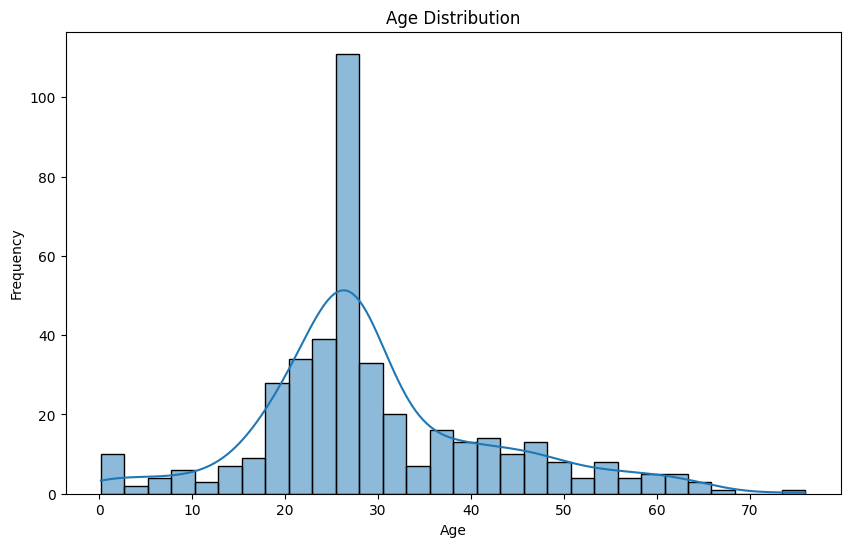

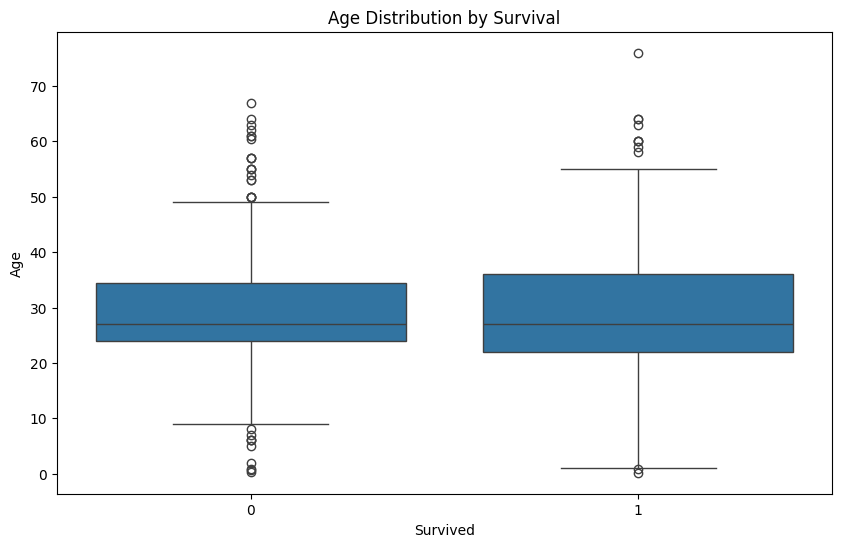

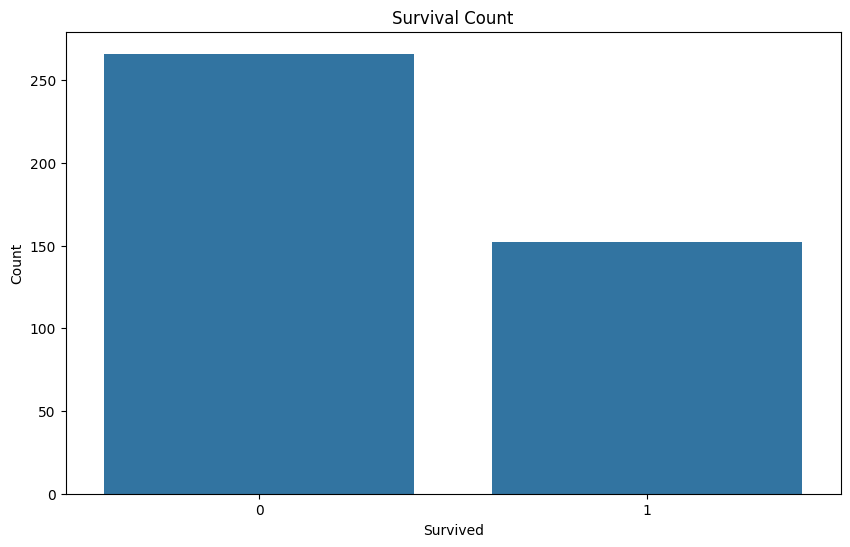

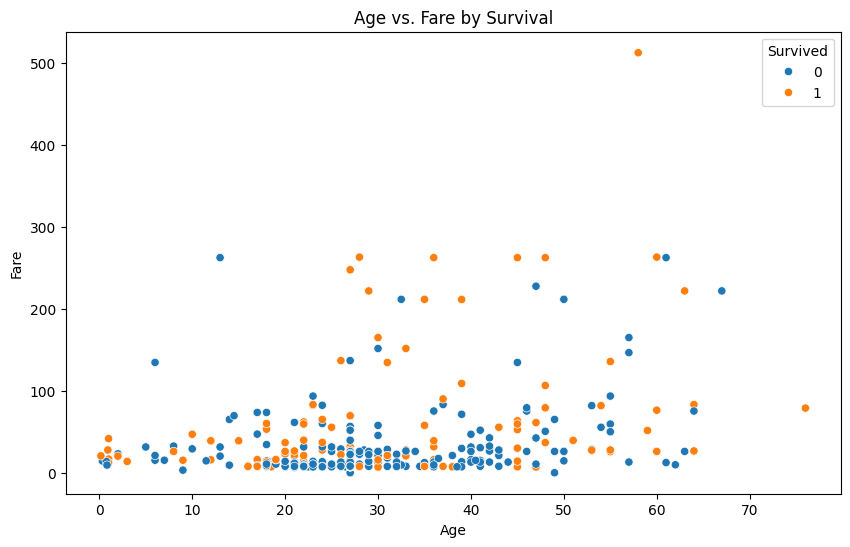

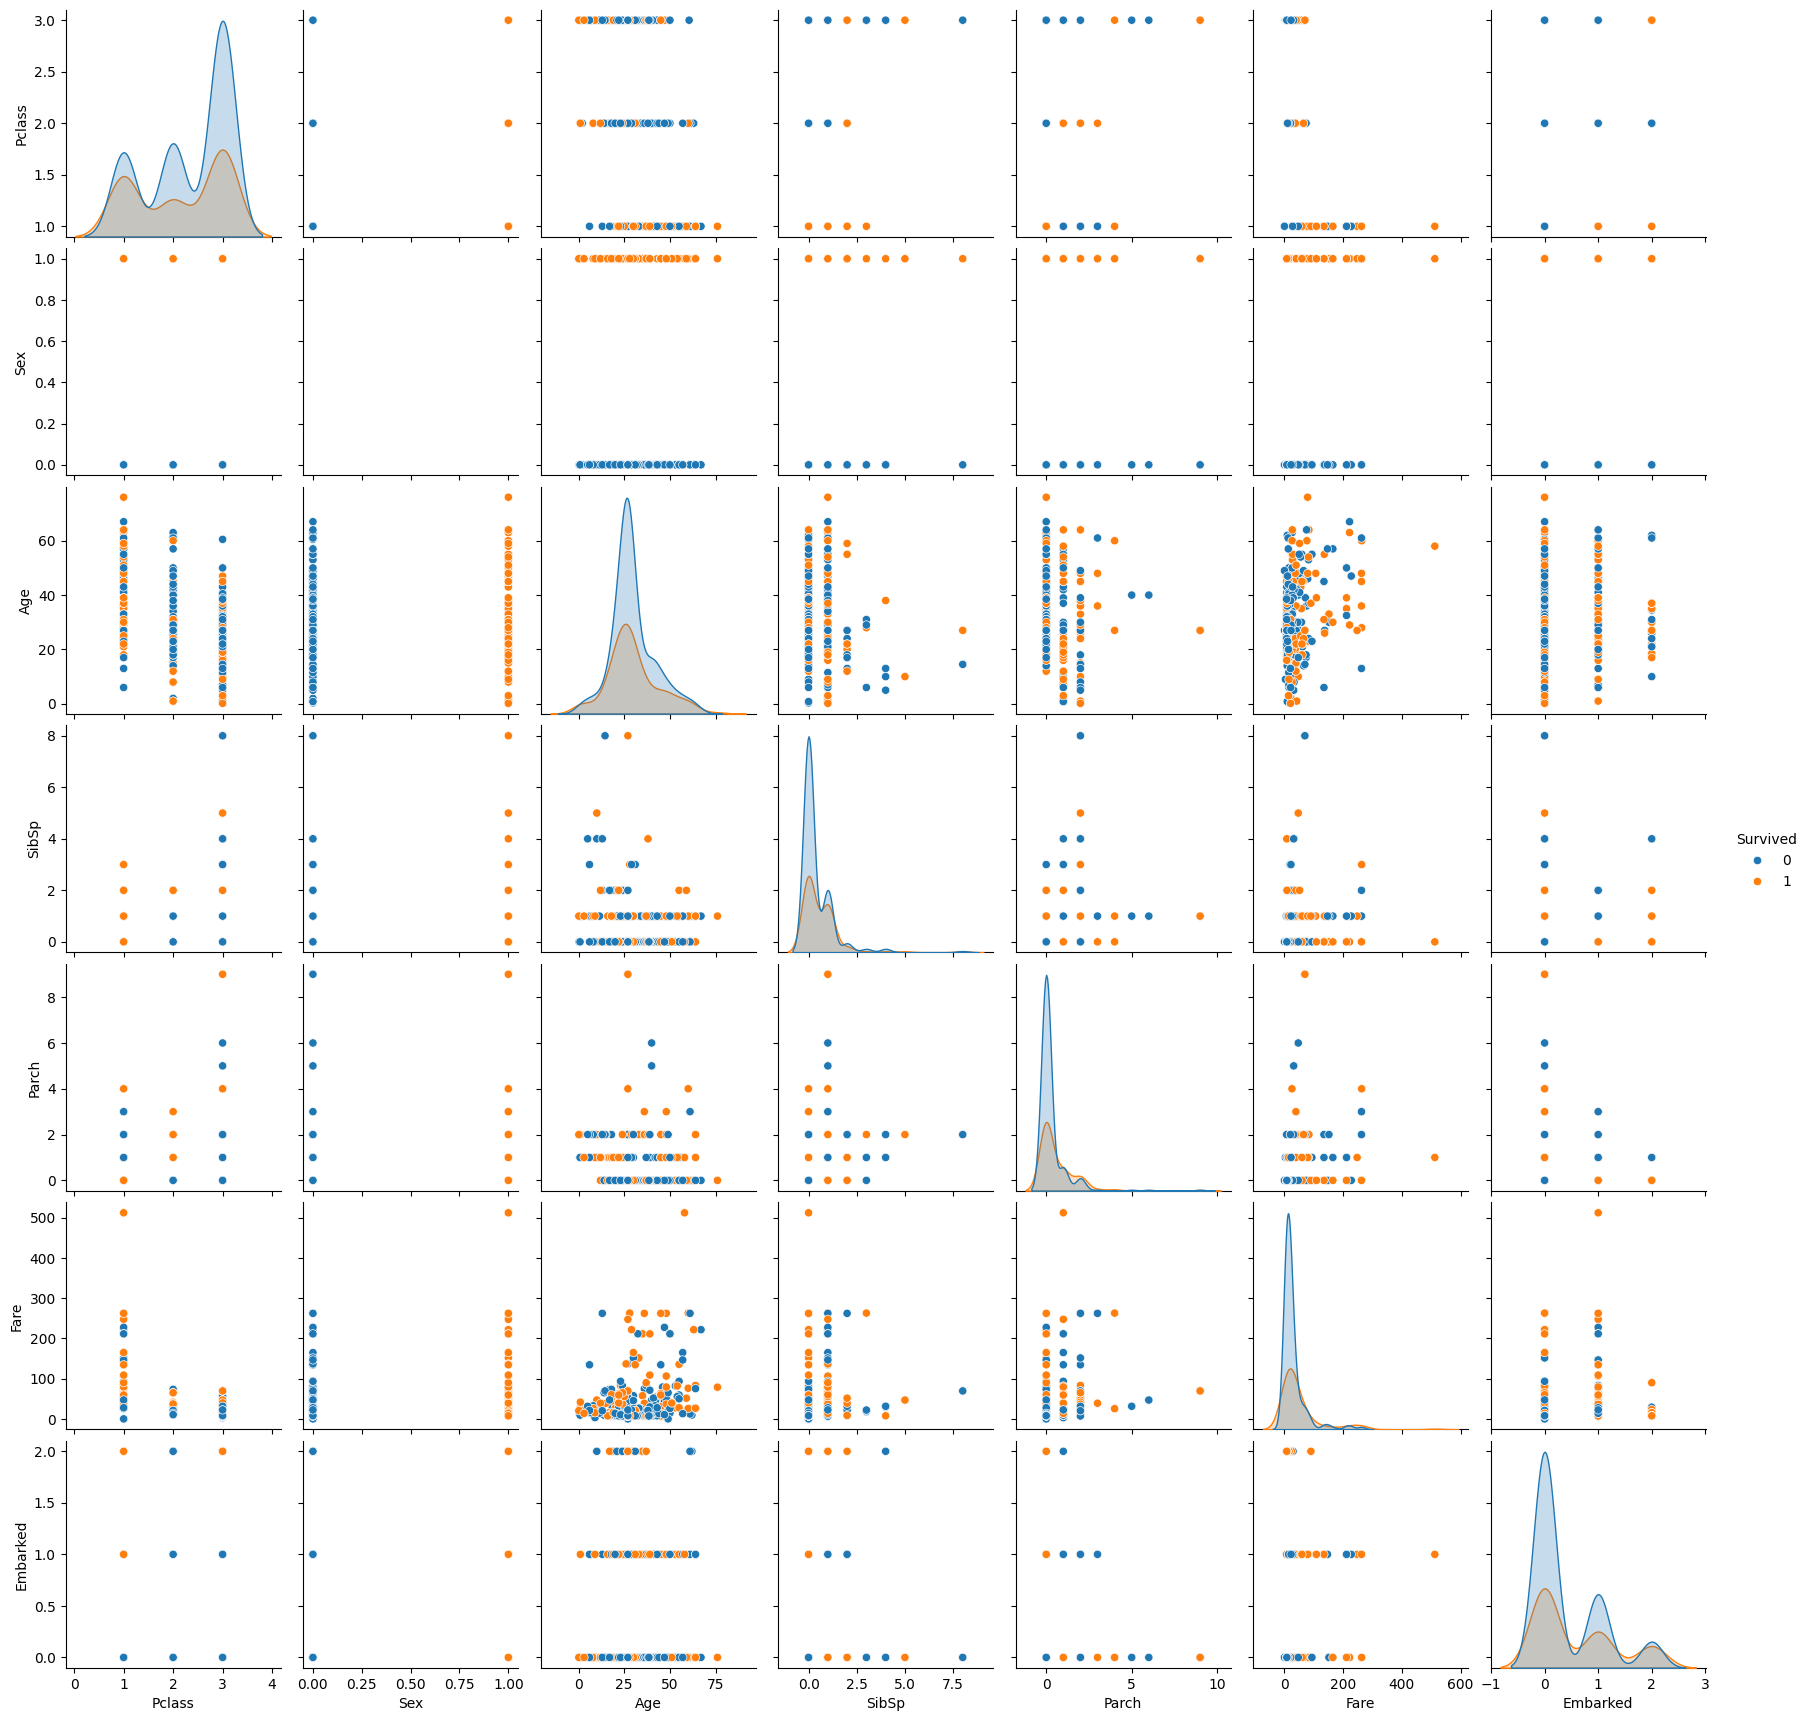

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Age
plt.figure(figsize=(10, 6))
sns.histplot(titanic['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Box plot of Age by Survival
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=titanic)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

# Count plot of Survived
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=titanic)
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Scatter plot of Age vs. Fare
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic)
plt.title('Age vs. Fare by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# Pair plot of all numerical features colored by Survival
sns.pairplot(titanic, hue='Survived')
plt.show()


# **Summary of Findings from the Titanic Dataset**
The Titanic dataset provides information about the passengers who were on board the RMS Titanic, which sank on its maiden voyage in 1912. The dataset includes variables such as age, sex, passenger class, fare, and survival status. Here's a summary of the findings and interesting patterns observed from the analysis.


---
**Data Overview**


*   **Features**: PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked
*   **Target Variable**: Survived (0 = No, 1 = Yes)
*   **Total Samples**: 891

---
**Key Findings**

*   **Survival Rate**: Approximately 38% of passengers survived the Titanic disaster.
*   **Gender and Survival**: A significantly higher proportion of women survived compared to men. Approximate Survival Rate: Female (74%), Male (19%)
*   **Passenger Class and Survival**: First-class passengers had a higher survival rate compared to second and third-class passengers. Approximate Survival Rate by Class: First (63%), Second (47%), Third (24%)

**Age and Survival**

*   Younger passengers had a higher survival rate.
*   Children (ages 0-10) had a particularly high survival rate.
*   The median age of survivors was lower than that of non-survivors.

**Embarked Port and Survival**

*   **Survival Rate by Embarkation**: Cherbourg (55%), Southampton (33%), Queenstown (39%). Passengers who embarked from Cherbourg (C) had a higher survival rate compared to those from Southampton (S) and Queenstown (Q).


**Fare and Survival**: Passengers who paid higher fares had higher survival rates. The median fare for survivors was higher than for non-survivors.

---
**Interesting Patterns and Insights**
*   **Gender and Survival**: The high survival rate of women suggests that the "women and children first" protocol was followed during the evacuation.
*   **Passenger Class and Fare**: There is a clear correlation between passenger class and fare. First-class passengers paid significantly higher fares. First-class passengers also had better access to lifeboats, contributing to their higher survival rate.
*   **Age Distribution**: The age distribution shows that children had a higher survival rate, indicating that they were given priority during evacuation. Most of the passengers were between 20 and 40 years old.
*   **Family Size and Survival**: Passengers traveling with smaller families had a slightly higher survival rate. Large families (more than 3 members) had lower survival rates, possibly due to the difficulty of coordinating during the evacuation.

---

**Visualizations**
*   **Age Distribution**: Histograms show the age distribution of passengers and highlight the higher survival rate among younger passengers.
*   **Box Plot of Age by Survival**: Box plots show the spread of ages for survivors and non-survivors, indicating that survivors tended to be younger.
*   **Survival Count**: A count plot shows the number of survivors and non-survivors, indicating the overall survival rate.
*   **Scatter Plot of Age vs. Fare**: Scatter plots show the relationship between age and fare, colored by survival status, indicating that higher fare payers had a higher chance of survival.
*   **Pair Plot**: Pair plots provide a comprehensive view of the pairwise relationships between features, highlighting correlations and patterns among the variables.
---
**Conclusion**

The analysis of the Titanic dataset reveals several important factors that influenced survival, including gender, passenger class, age, fare, and port of embarkation. Women, children, and first-class passengers had higher survival rates, suggesting that socio-economic status and evacuation protocols played significant roles in determining survival. These insights not only help us understand the dynamics of the Titanic disaster but also demonstrate the value of data analysis in uncovering patterns and trends in historical events.

By following these steps and examining these insights, you can gain a deeper understanding of the factors that affected survival on the Titanic and develop your skills in data analysis and visualization.